<table style="width:100%; border-collapse: collapse;">
  <tr>
    <td style="width:20%; vertical-align:middle;">
      <img src="LogoUVG.png" width="400"/>
    </td>
    <td style="text-align:left; vertical-align:middle;">
      <h2 style="margin-bottom: 0;">Universidad del Valle de Guatemala - UVG</h2>
      <h3 style="margin-top: 0;">Facultad de Ingeniería - Computación</h3>
      <p style="font-size: 16px; margin-bottom: 0; margin-top: -20px">
        <strong>Curso:</strong> CC3104 - Aprendizaje por Refuerzo 
        <strong>Sección:</strong> 10
      </p>
      <p style="font-size: 16px; margin: 0;"><strong>Laboratorio 2:</strong> EDA</p>
      <br>
      <p style="font-size: 15px; margin: 0;"><strong>Autores:</strong></p>
      <ul style="margin-top: 5px; padding-left: 20px; font-size: 15px;">
        <li>Diego Alexander Hernández Silvestre - <strong>21270</strong></li>
        <li>Linda Inés Jiménez Vides - <strong>21169</strong></li>
        <li>Mario Antonio Guerra Morales - <strong>21008</strong></li>
      </ul>
    </td>
  </tr>
</table>

## 📝 Task 1
Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.
1. ¿Qué es un Markov Decision Process (MDP)?

- Es un marco matemático con el cual se modelan decisiones en entornos estocásticos y secuenciales. Estos se basan en el principio de Markov, el cual establece que el estado futuro depende solamente del estado actual y la acción que se toma, no todo el historial.

2. ¿Cuáles son los componentes principales de un MDP?

- Sus componentes son: Estados (S), Acciones (A), Probabilidad de transición (P), Recompensa (R), y el Factor de Descuento (γ).

3. ¿Cuál es el objetivo principal del aprendizaje por refuerzo con MDPs?

- Su objetivo principal es de aprender una póliza óptima que maximice la recompensa obtenida y acumulada a largo plazo. La toma de decisiones que maximicen su beneficio total futuro.

## 📝 Task 2

1. Defina los componentes del MDP:
    - Estados: S = {0, 1, 2, 3, 4, 5, 6, 7, 8}, donde cada número representa una celda del laberinto.
    - Acciones: A = {arriba, abajo, izquierda, derecha}
    - Probabilidades de transición: P(s' | s, a)
    - Recompensas: R(s, a, s')

In [57]:
# Estados y acciones
states = list(range(9))  # 0 a 8
actions = ['up', 'down', 'left', 'right']

# Posiciones especiales
start_state = 0
goal_state = 2
obstacle_states = [4, 8]

# Función auxiliar para obtener estado nuevo
def move(state, action):
    row, col = divmod(state, 3)
    if action == 'up':
        row = max(row - 1, 0)
    elif action == 'down':
        row = min(row + 1, 2)
    elif action == 'left':
        col = max(col - 1, 0)
    elif action == 'right':
        col = min(col + 1, 2)
    new_state = 3 * row + col
    # No permite moverse a obstáculos
    if new_state in obstacle_states:
        return state
    return new_state

2. Matriz de transición:
    - Defina las probabilidades de transición P como un diccionario donde P[s][a] asigna los siguientes estados s' a sus probabilidades.

In [58]:
import numpy as np

# Probabilidad de transición determinista
P = {s: {} for s in states}
for s in states:
    for a in actions:
        s_prime = move(s, a)
        P[s][a] = {s_prime: 1.0}


3. Función de recompensa:
    - Defina las recompensas R como un diccionario donde R[s][a][s'] da la recompensa por la transición del estado s al estado s' mediante la acción a.

In [59]:

R = {s: {} for s in states}

for s in states:
    for a in actions:
        s_prime = move(s, a)
        # Definir recompensas
        if s_prime == goal_state:
            reward = 10
        elif s_prime in obstacle_states:
            reward = -5
        elif s == s_prime:
            reward = -1  # penaliza quedarse en el mismo lugar
        else:
            reward = -0.1  # pequeña penalización por moverse
        R[s][a] = {s_prime: reward}

4. Política:
    - Defina una política π como un diccionario que asigna cada estado a una acción.

In [60]:
policy = {
    0: 'right',
    1: 'right',
    2: 'down',
    3: 'right',
    4: 'down',
    5: 'left',
    6: 'right',
    7: 'right',
    8: 'up'
}

5. Simular la política:
    - Escriba una función para simular la política en el MDP para una cierta cantidad de pasos.
    - Realice un seguimiento de la recompensa acumulada obtenida siguiendo la política.

In [61]:
def simulatePolicy(policy, start_state, P, R, num_steps=10):
    state = start_state
    total_reward = 0
    trajectory = [state]

    for _ in range(num_steps):
        action = policy[state]

        next_state = list(P[state][action].keys())[0]

        reward = R[state][action][next_state]

        total_reward += reward
        trajectory.append(next_state)
        state = next_state

        if state == goal_state:
            break

    return trajectory, total_reward
trajectory, total_reward = simulatePolicy(policy, start_state, P, R, num_steps=20)
print("Trayectoria:", trajectory)


Trayectoria: [0, 1, 2]


6. Evaluar la Política:
    - Simule la póliza varias veces para estimar la recompensa acumulada promedio

In [62]:
def evaluatePolicy(policy, start_state, P, R, num_steps=20, num_simulations=100):
    rewards = []
    
    for _ in range(num_simulations):
        _, total_reward = simulatePolicy(policy, start_state, P, R, num_steps)
        rewards.append(total_reward)
    
    average_reward = np.mean(rewards)
    return average_reward, rewards

average_reward, all_rewards = evaluatePolicy(policy, start_state, P, R, num_steps=20, num_simulations=100)

print("Recompensa promedio:", average_reward)
print("Ejemplo de recompensas:", all_rewards)


Recompensa promedio: 9.9
Ejemplo de recompensas: [9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9]


## 📝 Task 3
<strong>En clase hemos dicho que una vez tengamos v* o q* sabemos la póliza óptima π* ¿Por qué?<br>
Puede consultar el libro en la sección 3.8 en adelante</strong>


Teniendo la función de valor óptimo de un estado (v*):

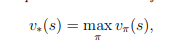

y teniendo la función de valor óptimo de estado-acción (q*):

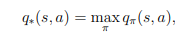

existe la relación entre q* y v*:

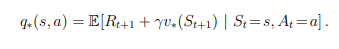

la cual nos dice que el valor óptimo de tomar una acción a en s es la recompensa esperada al hacer esa acción, más el valor óptimo esperado del siguiente estado. Esto significa que, en cada estado, tomamos la acción que tiene el mayor valor q\*, asegurando así el mayor retorno posible a largo plazo. Si solo tenemos v\*(s), podemos calcular q\*(s, a) usando la relación mostrada antes, y de igual manera elegir la acción que maximice este valor esperado. Por lo que, conocer v\* o q\* nos permite construir directamente la política óptima π\* de manera sencilla, simplemente maximizando en cada estado.

